**Import Libraries**

In [1]:
# Install packages if needed:
# !pip install yfinance pandas matplotlib numpy

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


**Download historical data**

In [2]:
ticker = "AAPL"
start_date = "2015-01-01"

data = yf.download(ticker, start=start_date, progress=False)

data.head()


/tmp/ipython-input-3235820998.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, progress=False)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.214888,24.682220,23.776348,24.671145,212818400
2015-01-05,23.532724,24.064287,23.346678,23.984553,257142000
2015-01-06,23.534939,23.794075,23.173918,23.596954,263188400
2015-01-07,23.864943,23.964610,23.632383,23.743125,160423600
2015-01-08,24.781893,24.839479,24.075357,24.192745,237458000


**Data preparation**

In [3]:
# Daily returns
data["Return"] = data["Close"].pct_change()

# 50-day moving average
data["MA50"] = data["Close"].rolling(window=50).mean()

# Drop missing values
data = data.dropna()

data.tail()


Price,Close,High,Low,Open,Volume,Return,MA50
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2026-02-06,277.859985,280.647386,276.671095,276.860920,50453400,0.008010,268.451004
2026-02-09,274.619995,278.200012,271.700012,277.910004,44623400,-0.011661,268.409182
2026-02-10,273.679993,275.369995,272.940002,274.890015,34376900,-0.003423,268.336971
2026-02-11,275.500000,280.179993,274.450012,274.700012,51931300,0.006650,268.275185
2026-02-12,261.730011,275.720001,260.179993,275.600006,71430852,-0.049982,267.853078


**Price and moving average plot**

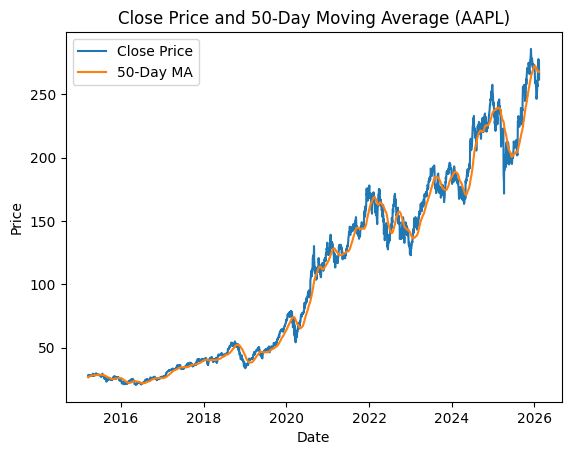

In [4]:
plt.figure()
plt.plot(data["Close"], label="Close Price")
plt.plot(data["MA50"], label="50-Day MA")

plt.title("Close Price and 50-Day Moving Average (AAPL)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

plt.show()


**Daily returns histogram**

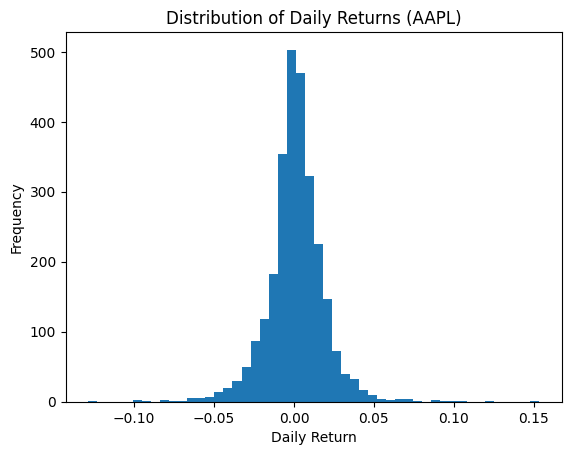

In [5]:
plt.figure()
plt.hist(data["Return"], bins=50)

plt.title("Distribution of Daily Returns (AAPL)")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

plt.show()


**Basic quantitative metrics**

In [6]:
mean_return = data["Return"].mean()
volatility = data["Return"].std()

annual_return = mean_return * 252
annual_volatility = volatility * np.sqrt(252)

print("Mean daily return:", round(mean_return, 5))
print("Daily volatility:", round(volatility, 5))
print("Annualized return:", round(annual_return, 3))
print("Annualized volatility:", round(annual_volatility, 3))


Mean daily return: 0.00099
Daily volatility: 0.01816
Annualized return: 0.248
Annualized volatility: 0.288


**Cumulative performance**

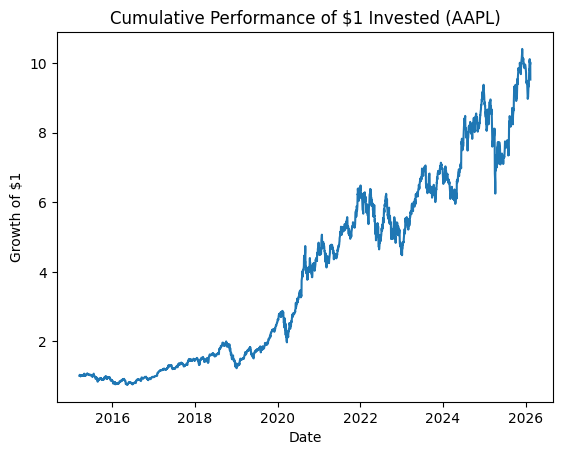

In [7]:
data["Cumulative"] = (1 + data["Return"]).cumprod()

plt.figure()
plt.plot(data["Cumulative"])

plt.title("Cumulative Performance of $1 Invested (AAPL)")
plt.xlabel("Date")
plt.ylabel("Growth of $1")

plt.show()
